<a href="https://colab.research.google.com/github/mks2607/Data_mks/blob/mks2607/Chess_Game_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/games.csv')

In [16]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


# 1. Какие фигуры чаще выигрывают черные или белые.


In [22]:
df_winner = df.groupby('winner')['moves'].count().reset_index()
df_winner

,winner,moves
0,black,9107
1,draw,950
2,white,10001


<Axes: >

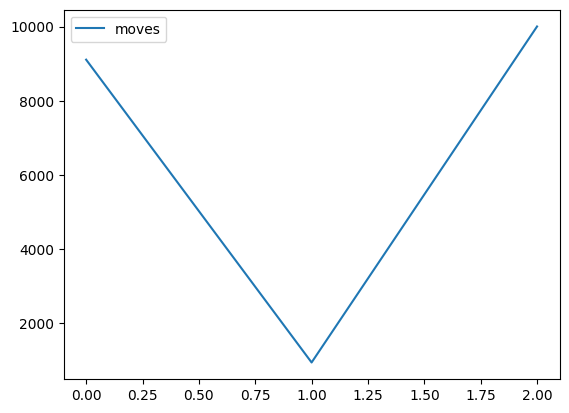

In [35]:
df_winner.plot()

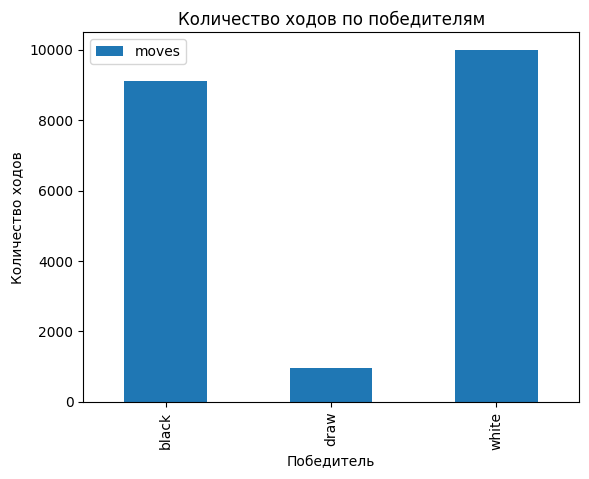

In [34]:
df_winner.plot(x='winner', y='moves', kind='bar')

# Добавление заголовка и меток осей
plt.title('Количество ходов по победителям')
plt.xlabel('Победитель')
plt.ylabel('Количество ходов')

# Показать диаграмму
plt.show()

# 2. Выведем 10 играков которые сыграли больше всего игр(по id).

In [49]:
id_user_white = df.groupby('white_id')['id'].count().sort_values(ascending=False).reset_index().head(10)
id_user_white

,white_id,id
0,taranga,72
1,chess-brahs,53
2,a_p_t_e_m_u_u,49
3,ssf7,48
4,bleda,48
5,hassan1365416,44
6,khelil,41
7,1240100948,38
8,ozguragarr,38
9,saviter,38


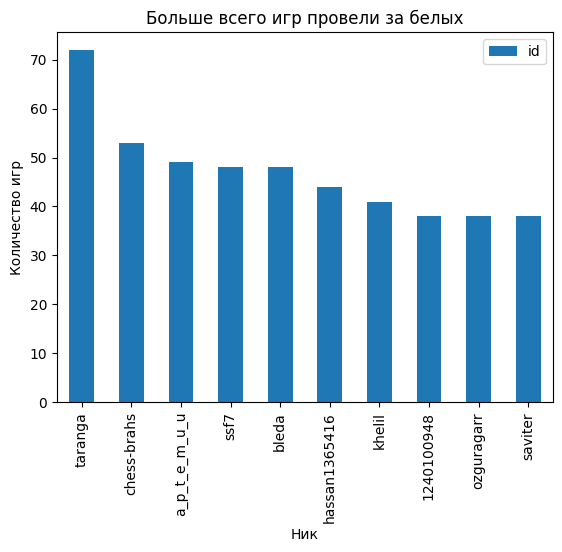

In [51]:
id_user_white.plot(x='white_id', y='id', kind='bar')

# Добавление заголовка и меток осей
plt.title('Больше всего игр провели за белых')
plt.xlabel('Ник')
plt.ylabel('Количество игр')

# Показать диаграмму
plt.show()

In [52]:
id_user_black = df.groupby('black_id')['id'].count().sort_values(ascending=False).reset_index().head(10)
id_user_black

,black_id,id
0,taranga,82
1,vladimir-kramnik-1,60
2,a_p_t_e_m_u_u,47
3,king5891,44
4,docboss,44
5,ducksandcats,41
6,cape217,38
7,saviter,38
8,anakgreget,36
9,artem555,34


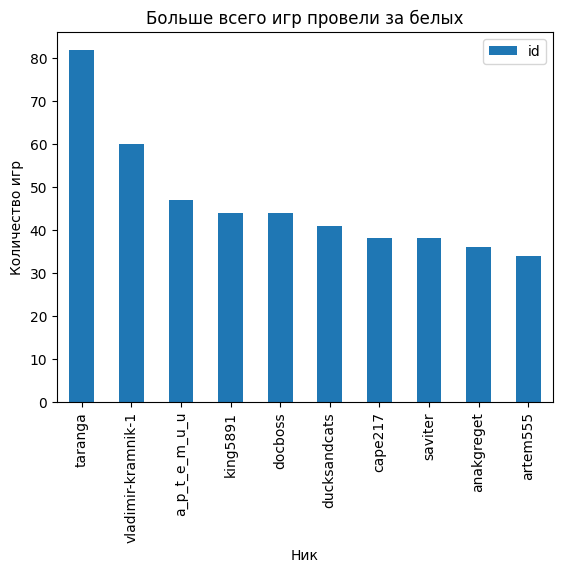

In [54]:
id_user_black.plot(x='black_id', y='id', kind='bar')

# Добавление заголовка и меток осей
plt.title('Больше всего игр провели за белых')
plt.xlabel('Ник')
plt.ylabel('Количество игр')

# Показать диаграмму
plt.show()

# 3. По какой причине чаще всего игроки сдаются.

In [58]:
status_game = df.groupby('victory_status')['id'].count().sort_values(ascending=False).reset_index()
status_game

,victory_status,id
0,resign,11147
1,mate,6325
2,outoftime,1680
3,draw,906


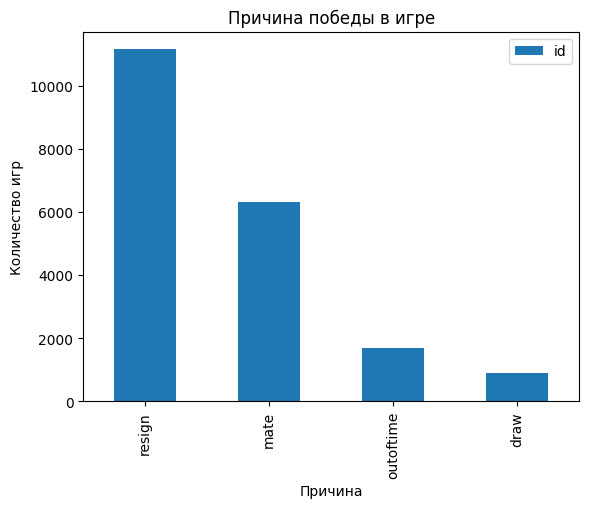

In [60]:
status_game.plot(x='victory_status', y='id', kind='bar')

# Добавление заголовка и меток осей
plt.title('Причина победы в игре')
plt.xlabel('Причина')
plt.ylabel('Количество игр')

# Показать диаграмму
plt.show()